
## Logistic Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

HR data is also avaialble using this link:<br>
https://www.elsevier.com/books-and-journals/book-companion/9780128219294<br><br>
The input features include Late show up percentage, Project initiative percentage, Percentage of project delivery on time, Percentage of emails exchanged, Percentage of responsiveness, Percentage of professional email response, Percentage of sharing ideas, Percentage of helping colleagues, Percentage of entrepreneurial posts on LinkedIn, and Percentage of Facebook comments.<br><br>

The output feature ("Quitting") where 0 means that an employee is staying

In [ ]:
#access the local directory
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/data_analytics/HR_DataSet.csv'
df=pd.read_csv(path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Late show up percentage,Project initiative percentage,Percentage of project delivery on time,Percentage of emails exchanged,Percentage of responsiveness,Percentage of professional email response,Percentage of sharing ideas,Percentage of helping colleagues,Percentage of entrepreneurial posts on LinkedIn,Percentage of Facebook comments,Quitting
0,0.477912,0.517593,0.255846,0.446856,0.348797,0.064235,0.327526,0.231719,0.338214,0.471767,1
1,0.298068,0.403864,0.234836,0.490999,0.456119,0.274872,0.268036,0.480550,0.168622,0.680091,0
2,0.353470,0.545904,0.483996,0.509837,0.907533,0.326371,0.938657,0.575397,0.389811,0.514970,0
3,0.684900,0.678940,0.310686,0.490986,0.619742,0.436264,0.785889,0.727165,0.761269,0.409326,1
4,0.714167,0.365101,0.294082,0.392456,0.687196,0.314229,0.578492,0.233666,0.722546,0.621463,1


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Late show up percentage,1000.0,0.501025,0.187179,0.0,0.367040,0.495075,0.639074,1.0
Project initiative percentage,1000.0,0.483284,0.184640,0.0,0.359586,0.486289,0.622330,1.0
Percentage of project delivery on time,1000.0,0.427376,0.187881,0.0,0.286459,0.413932,0.552530,1.0
Percentage of emails exchanged,1000.0,0.400711,0.144444,0.0,0.295613,0.397399,0.496453,1.0
Percentage of responsiveness,1000.0,0.537204,0.182367,0.0,0.416221,0.539818,0.661523,1.0
Percentage of professional email response,1000.0,0.484969,0.182355,0.0,0.355052,0.483522,0.612790,1.0
Percentage of sharing ideas,1000.0,0.471185,0.179900,0.0,0.344950,0.458429,0.592071,1.0
Percentage of helping colleagues,1000.0,0.519861,0.194477,0.0,0.381461,0.515514,0.661990,1.0
Percentage of entrepreneurial posts on LinkedIn,1000.0,0.521589,0.193181,0.0,0.374331,0.526394,0.669513,1.0
Percentage of Facebook comments,1000.0,0.576462,0.162826,0.0,0.464761,0.586543,0.689762,1.0


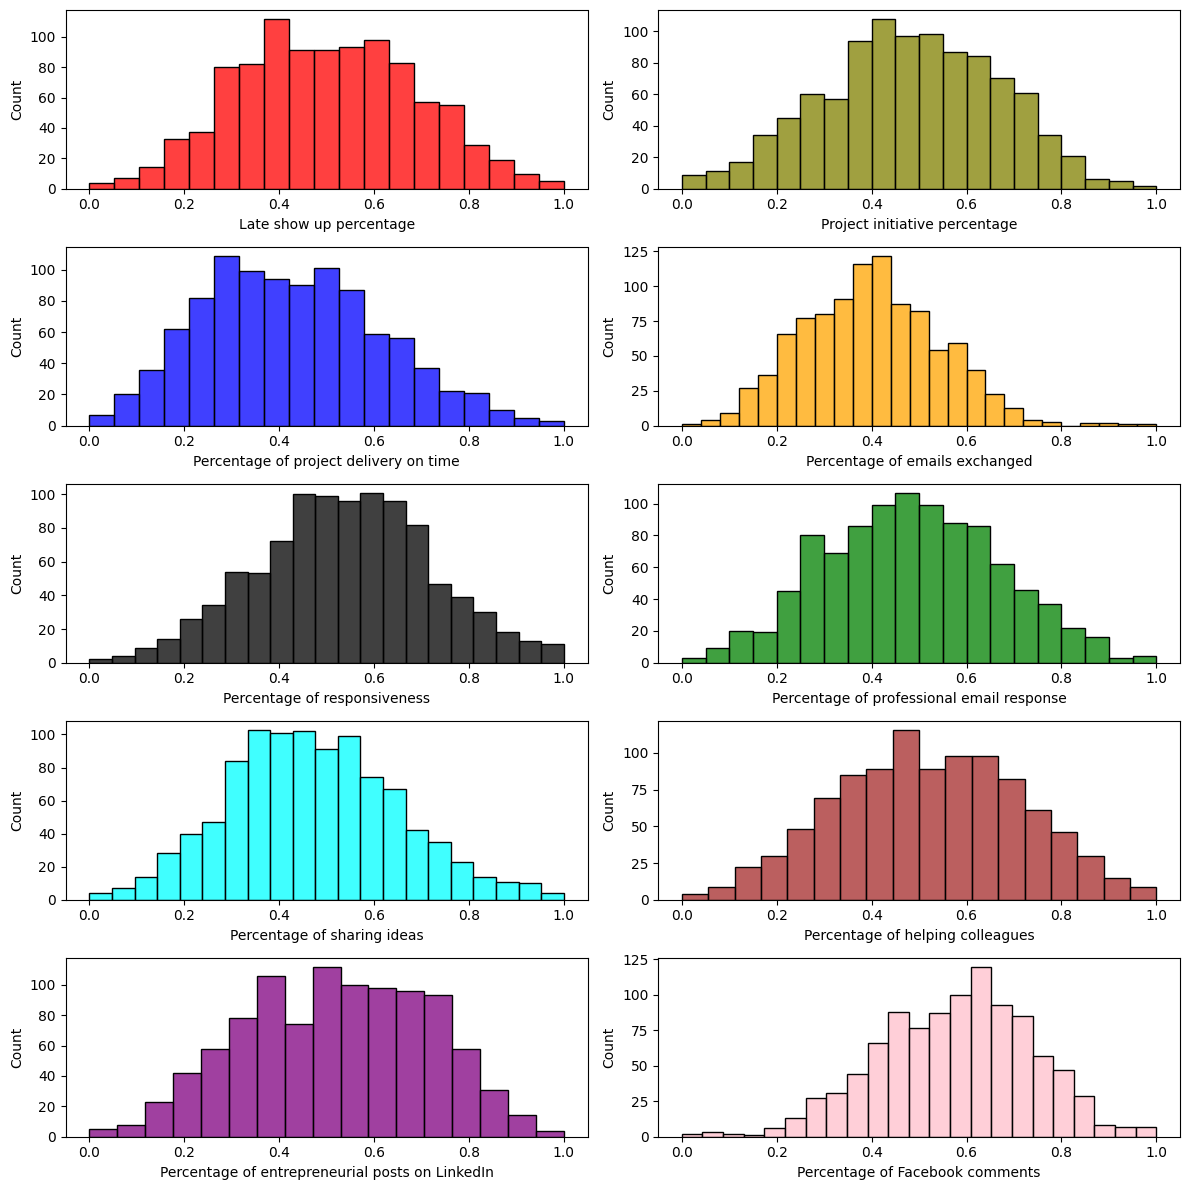

In [ ]:
f, axes = plt.subplots(5, 2, figsize=(12, 12))
sns.histplot(df['Late show up percentage'] , color="red", ax=axes[0, 0])
sns.histplot(df['Project initiative percentage'] , color="olive", ax=axes[0, 1])
sns.histplot(df['Percentage of project delivery on time'] , color="blue", ax=axes[1, 0])
sns.histplot(df['Percentage of emails exchanged'] , color="orange", ax=axes[1, 1])
sns.histplot(df['Percentage of responsiveness'] , color="black", ax=axes[2, 0])
sns.histplot(df['Percentage of professional email response'] , color="green", ax=axes[2, 1])
sns.histplot(df['Percentage of sharing ideas'] , color="cyan", ax=axes[3, 0])
sns.histplot(df['Percentage of helping colleagues'] , color="brown", ax=axes[3, 1])
sns.histplot(df['Percentage of entrepreneurial posts on LinkedIn'] , color="purple", ax=axes[4, 0])
sns.histplot(df['Percentage of Facebook comments'] , color="pink", ax=axes[4, 1])
plt.tight_layout()

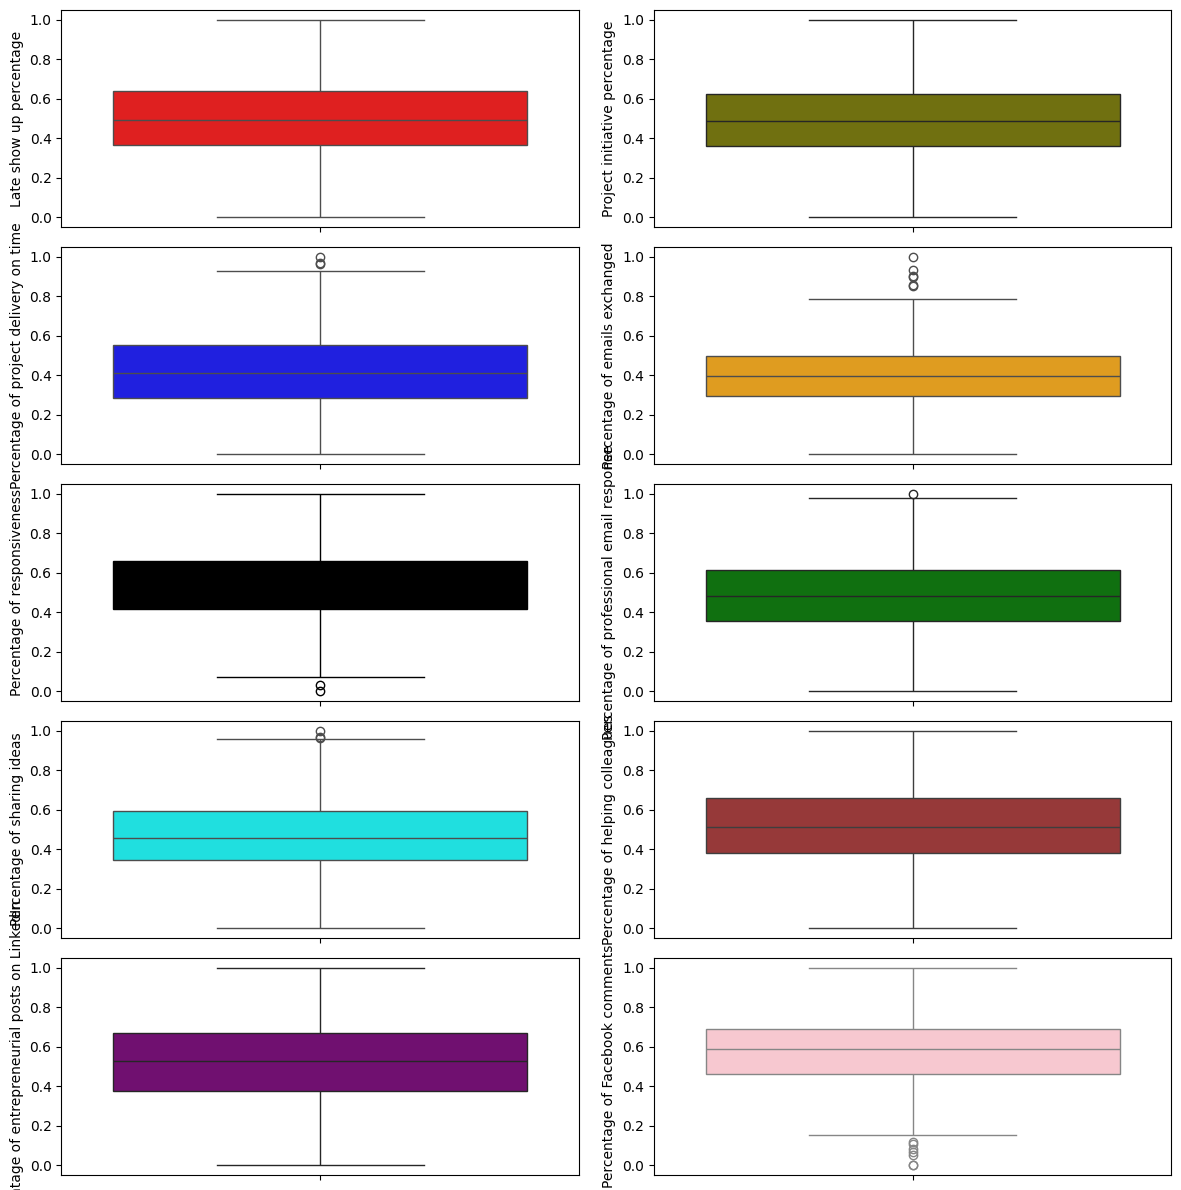

In [ ]:
f, axes = plt.subplots(5, 2, figsize=(12, 12))
sns.boxplot(df['Late show up percentage'] , color="red", ax=axes[0, 0])
sns.boxplot(df['Project initiative percentage'] , color="olive", ax=axes[0, 1])
sns.boxplot(df['Percentage of project delivery on time'] , color="blue", ax=axes[1, 0])
sns.boxplot(df['Percentage of emails exchanged'] , color="orange", ax=axes[1, 1])
sns.boxplot(df['Percentage of responsiveness'] , color="black", ax=axes[2, 0])
sns.boxplot(df['Percentage of professional email response'] , color="green", ax=axes[2, 1])
sns.boxplot(df['Percentage of sharing ideas'] , color="cyan", ax=axes[3, 0])
sns.boxplot(df['Percentage of helping colleagues'] , color="brown", ax=axes[3, 1])
sns.boxplot(df['Percentage of entrepreneurial posts on LinkedIn'] , color="purple", ax=axes[4, 0])
sns.boxplot(df['Percentage of Facebook comments'] , color="pink", ax=axes[4, 1])
plt.tight_layout()

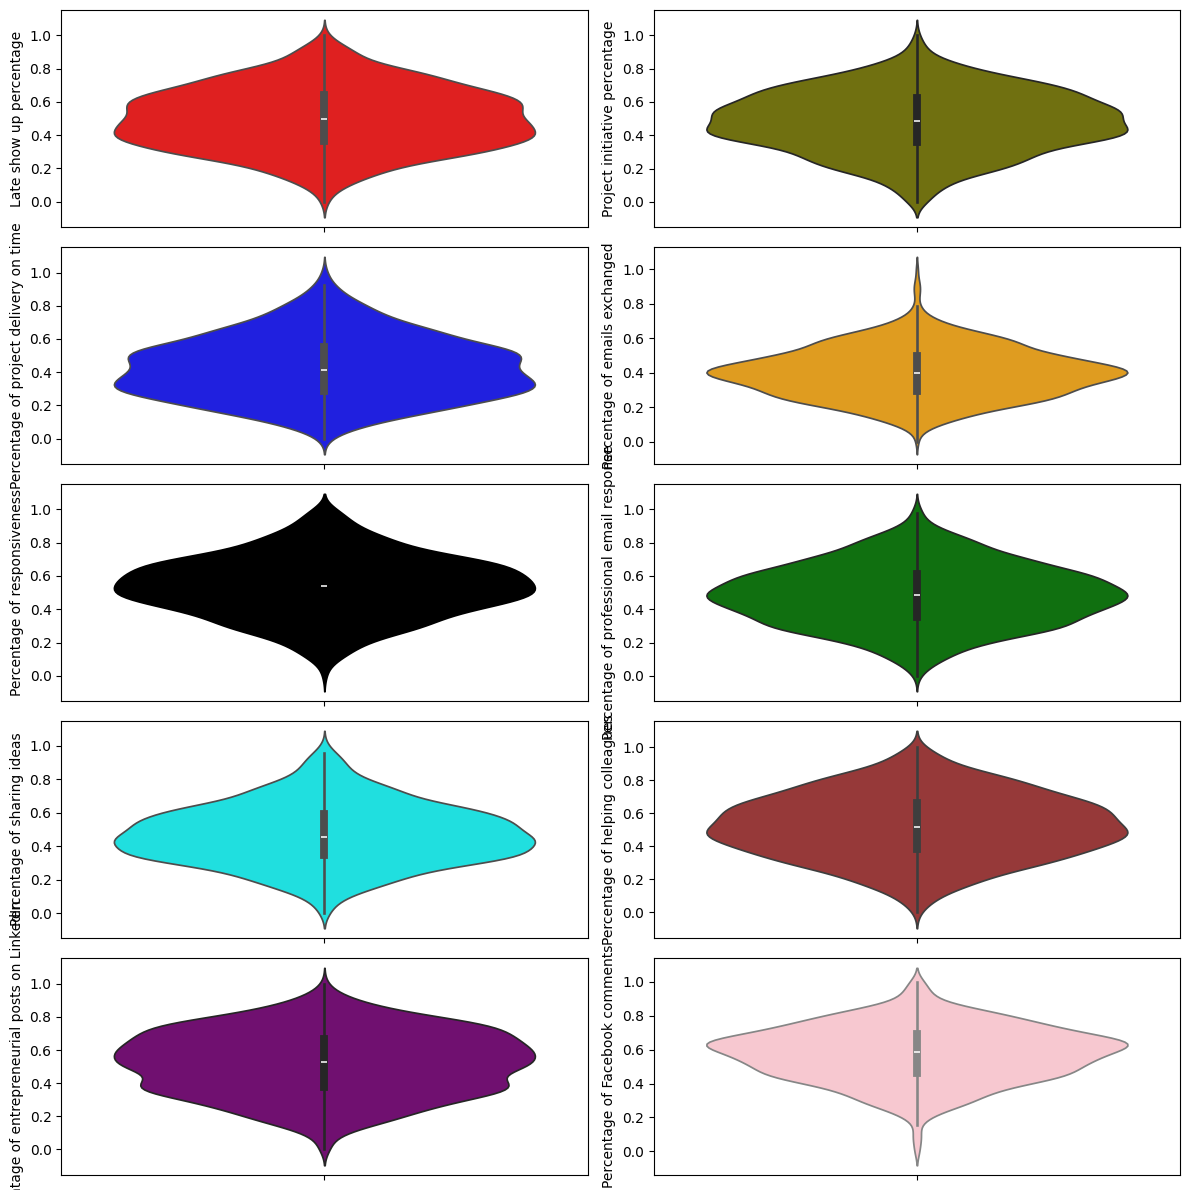

In [ ]:
#Let’s plot the distribution and violin plots as follows:
f, axes = plt.subplots(5, 2, figsize=(12, 12))
sns.violinplot(df['Late show up percentage'] , color="red", ax=axes[0, 0])
sns.violinplot(df['Project initiative percentage'] , color="olive", ax=axes[0, 1])
sns.violinplot(df['Percentage of project delivery on time'] , color="blue", ax=axes[1, 0])
sns.violinplot(df['Percentage of emails exchanged'] , color="orange", ax=axes[1, 1])
sns.violinplot(df['Percentage of responsiveness'] , color="black", ax=axes[2, 0])
sns.violinplot(df['Percentage of professional email response'] , color="green", ax=axes[2, 1])
sns.violinplot(df['Percentage of sharing ideas'] , color="cyan", ax=axes[3, 0])
sns.violinplot(df['Percentage of helping colleagues'] , color="brown", ax=axes[3, 1])
sns.violinplot(df['Percentage of entrepreneurial posts on LinkedIn'] , color="purple", ax=axes[4, 0])
sns.violinplot(df['Percentage of Facebook comments'] , color="pink", ax=axes[4, 1])
plt.tight_layout()

The distribution plots show all the input features have normal
distributions. There is no outlier. This does not usually happen in practice

<Axes: >

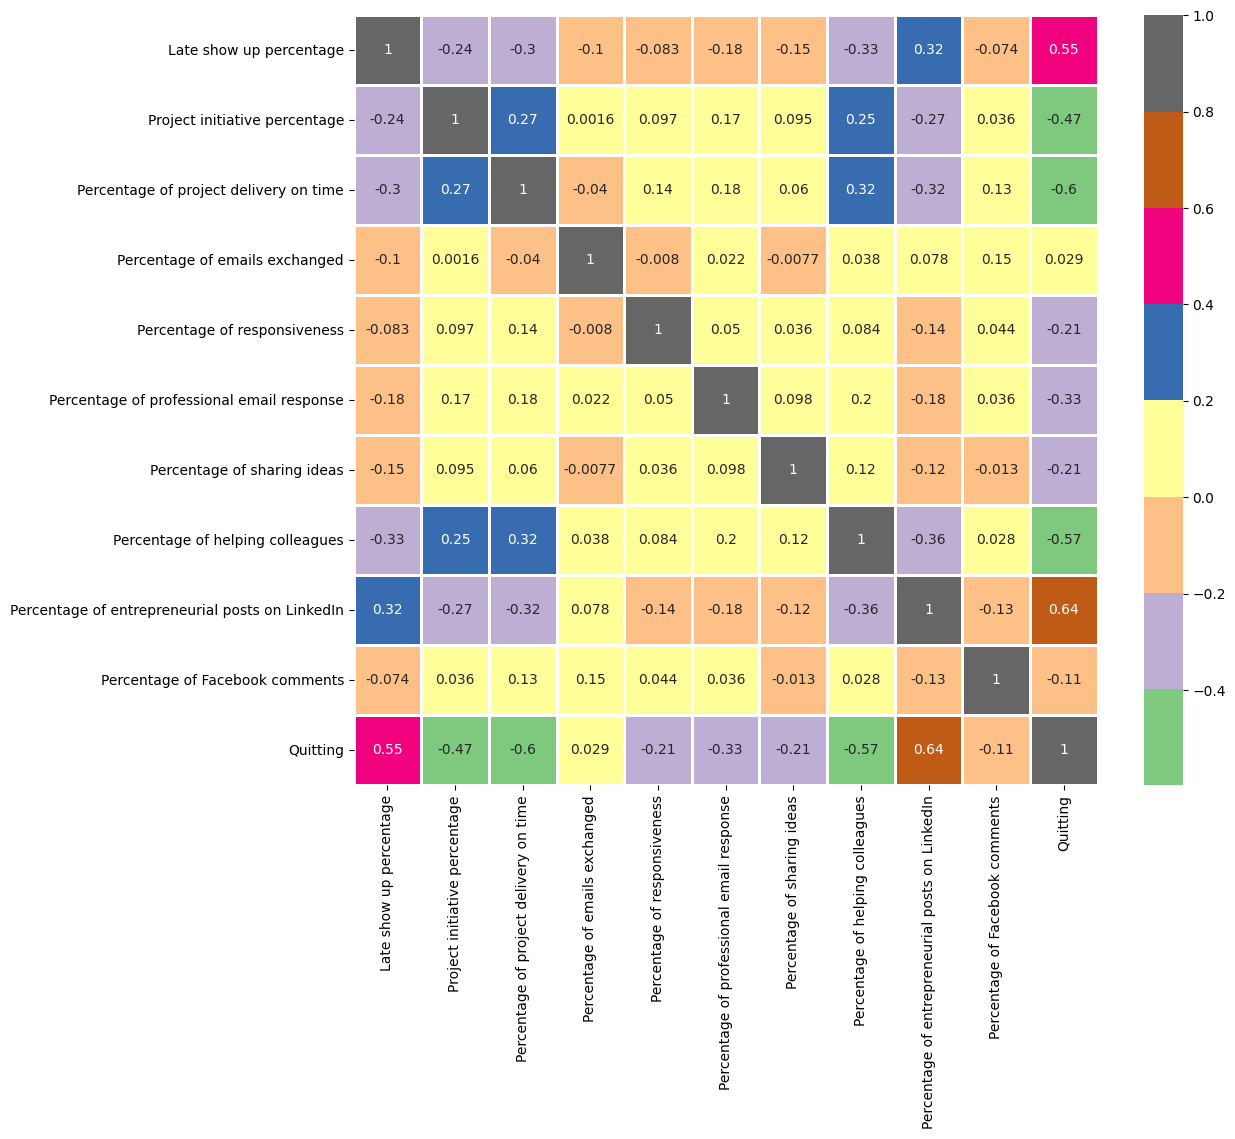

In [ ]:
#let’s plot the Pearson correlation coefficient heat map as follows.
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, linecolor='white',linewidths=2, cmap= 'Accent')

There appears to be no collinear input features in this data set.

All parameters are between 0 and 1; thus, no no normalization is needed.

In [ ]:
#parameters defined here
x_features=df.drop('Quitting',axis=1)
y=df['Quitting'] #output feature

In [ ]:
df

,Late show up percentage,Project initiative percentage,Percentage of project delivery on time,Percentage of emails exchanged,Percentage of responsiveness,Percentage of professional email response,Percentage of sharing ideas,Percentage of helping colleagues,Percentage of entrepreneurial posts on LinkedIn,Percentage of Facebook comments,Quitting
0,0.477912,0.517593,0.255846,0.446856,0.348797,0.064235,0.327526,0.231719,0.338214,0.471767,1
1,0.298068,0.403864,0.234836,0.490999,0.456119,0.274872,0.268036,0.480550,0.168622,0.680091,0
2,0.353470,0.545904,0.483996,0.509837,0.907533,0.326371,0.938657,0.575397,0.389811,0.514970,0
3,0.684900,0.678940,0.310686,0.490986,0.619742,0.436264,0.785889,0.727165,0.761269,0.409326,1
4,0.714167,0.365101,0.294082,0.392456,0.687196,0.314229,0.578492,0.233666,0.722546,0.621463,1
...,...,...,...,...,...,...,...,...,...,...,...
995,0.540622,0.425615,0.439613,0.363198,0.540406,0.230579,0.318439,0.013646,0.494684,0.565135,1
996,0.259226,0.369436,0.496785,0.470391,0.823357,0.717082,0.536417,0.278421,0.390341,0.816257,0
997,0.621092,0.388595,0.393724,0.548295,0.438829,0.443107,0.064574,0.060641,0.364369,0.594624,1
998,0.588408,0.301913,0.152232,0.390393,0.968955,0.485200,0.395298,0.512713,0.599986,0.437207,1


# Train_Test_Split

In [ ]:
seed= 50
np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(x_features,y, test_size=0.30)

In [ ]:
len(X_train)

700

# Applying Logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression #import logistic regression library

In [ ]:
np.random.seed(seed)
lr = LogisticRegression(penalty='l2', C=1.0,solver='lbfgs') #solver options that scikit-learn offers in logistic regression are "newton-cg," "lbfgs," "liblinear," "sag," "saga."

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
len(y_pred)

300

# Prediction and evaluation

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

[[143   9]
 [  4 144]]


<Axes: >

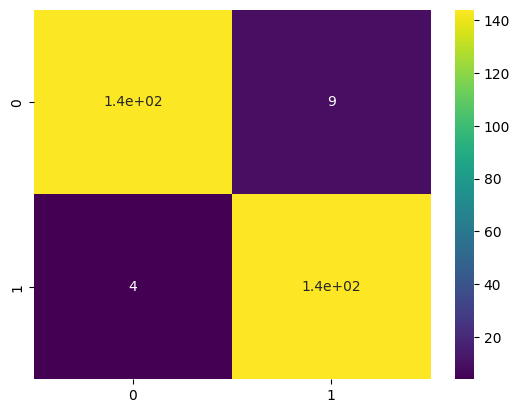

In [ ]:
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='viridis')

143 instances (out of 152) were correctly
classified as class 0 (not quitting) and 9 were incorrectly classified under this
class. On the other hand, 144 instances (out of 148) were correctly classified as
class 1 (quitting) and only 4 instances were incorrectly classified.

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       152
           1       0.94      0.97      0.96       148

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



The overall accuracy of the model is 96%. <br>
The precision and recall percentage for each class are high and range from 94% to 97% with a
balanced class instances in each group.